### Understanding the data
**Age:** insurance contractor age, years

**Sex:** insurance contractor gender, [female, male]

**BMI:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**Children:** number of children covered by health insurance / Number of dependents

**Smoker:** smoking, [yes, no]

**Region:** the beneficiary’s residential area in the US, [northeast, southeast, southwest, northwest]

**Charges:** Individual medical costs billed by health insurance, **predicted value**

### Importing required library!!

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from xgboost.sklearn import XGBRegressor
import warnings
warnings.filterwarnings("ignore")


In [118]:
#Reading the dataset
df = pd.read_csv("insurance.csv")

In [119]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [120]:
df.shape

(1338, 7)

In [121]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [122]:
#check for dublicated rows
print("Numbers of duplicated rows :",df.duplicated().sum())


Numbers of duplicated rows : 1


In [123]:
#dropping the duplicated rows 
df=df.drop_duplicates(keep="first")
print("After removing,number of duplicated rows are:",df.duplicated().sum())

After removing,number of duplicated rows are: 0


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [125]:
#Checking unique values
for col in df.columns:
    print(col,df[col].unique())

age [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
sex ['female' 'male']
bmi [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34

In [126]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [127]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [128]:
#check the correlation between target and each of columns
df.corr()["charges"]

age         0.298308
bmi         0.198401
children    0.067389
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

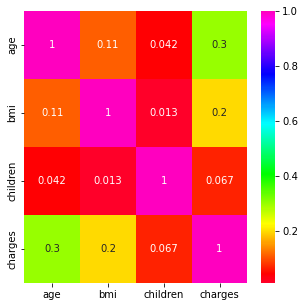

In [129]:
plt.figure(figsize=(5,5))

#plot heat map
sns.heatmap(df.corr(),annot=True,cmap="gist_rainbow",linecolor='black')

### EDA & Visualization

In [130]:
cat_col=["sex","smoker","region","children"]

In [131]:
df["sex"].value_counts()

male      675
female    662
Name: sex, dtype: int64

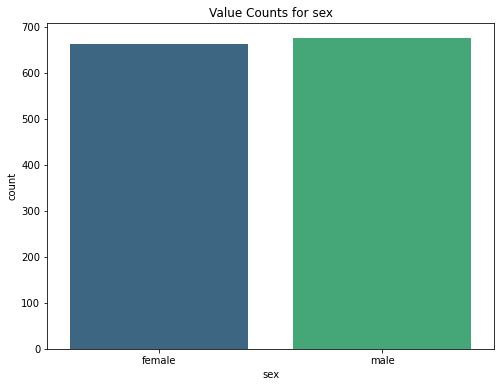

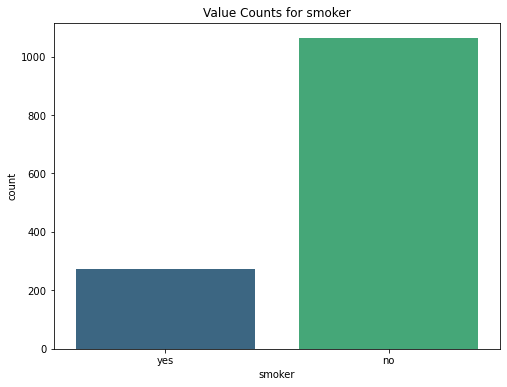

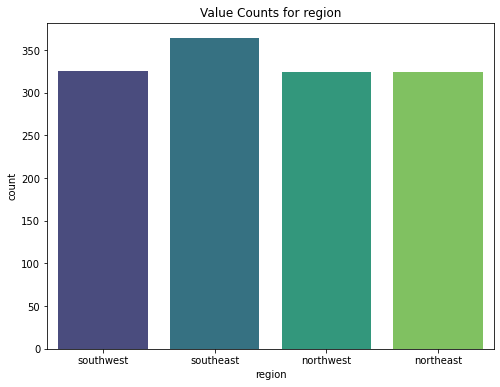

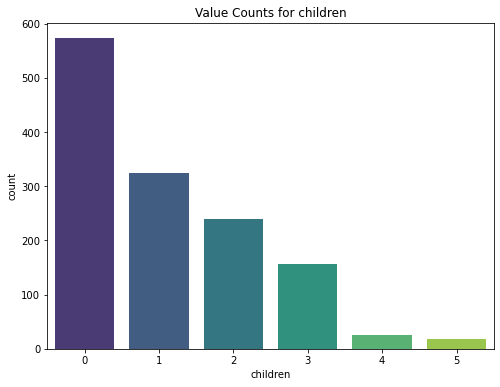

In [132]:
for column in cat_col:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Value Counts for {column}')
    plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

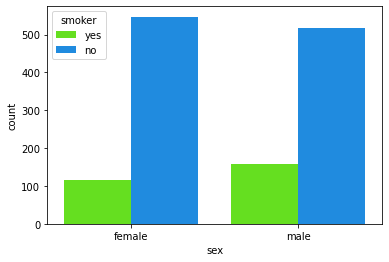

In [133]:
#analysis sex vs smoker columns combinely 
sns.countplot(df["sex"],hue=df["smoker"],palette="gist_rainbow")

**Ater Ploting graph we get to know male smoke more as compare to females!!**

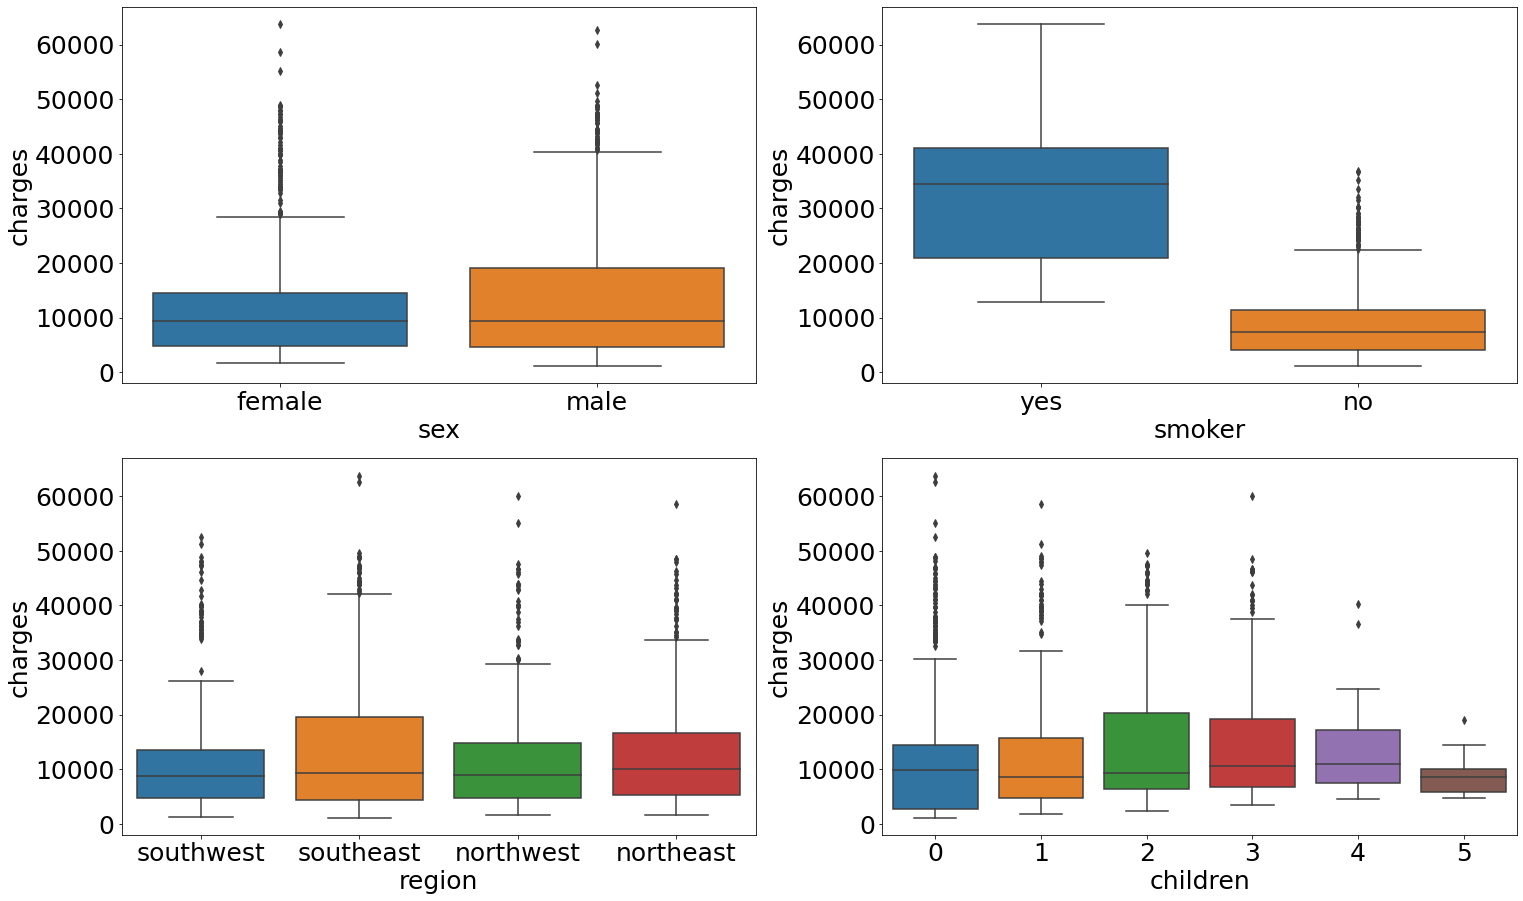

In [134]:
i=1
plt.figure(figsize=(25,90))
for col in cat_col:
    
    plt.subplot(11,2,i)
    sns.boxplot(df[col],df["charges"])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("charges",fontsize=25)
    i=i+1

plt.show()


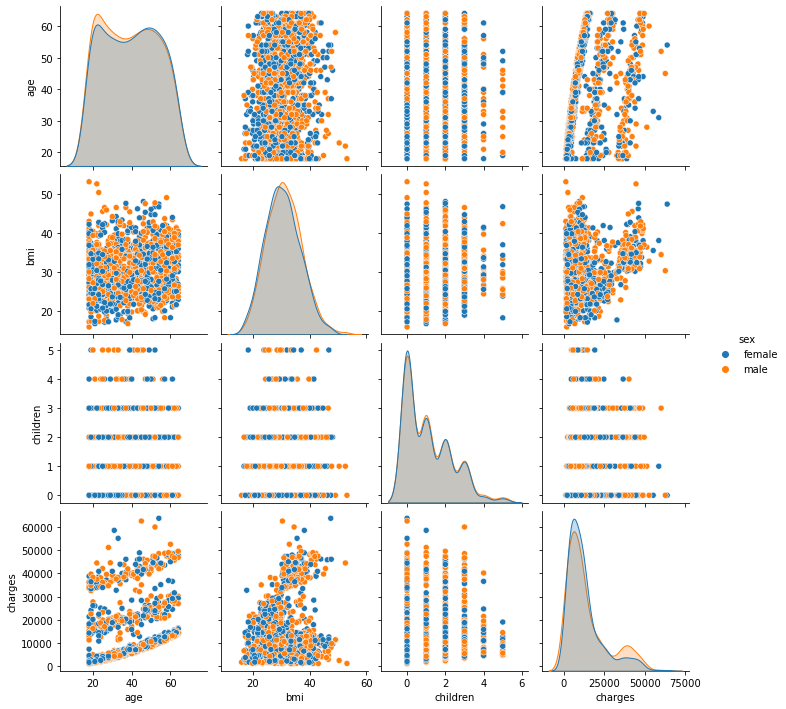

In [135]:
#anlysis numerical columns
sns.pairplot(df,hue="sex")

Text(0.5, 0, 'charges')

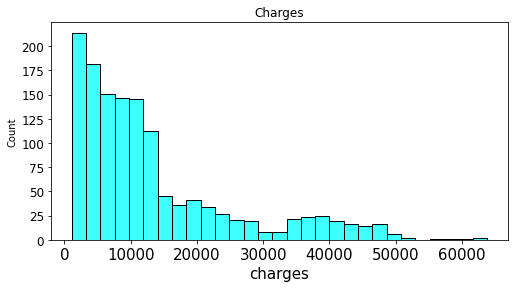

In [136]:
#analysis chareges columns
plt.figure(figsize=(18,4))
plt.subplot(121)
sns.histplot(df["charges"],color="#00FFFF")
plt.title("Charges")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("charges",fontsize=15)

<Figure size 1440x576 with 0 Axes>

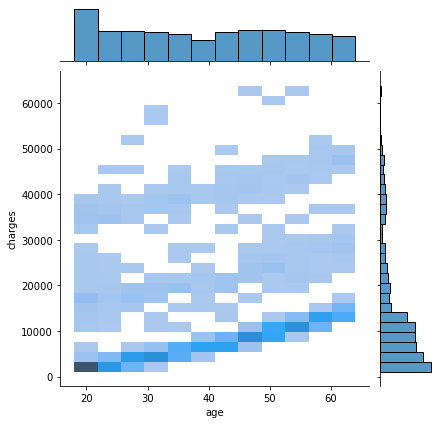

In [137]:
#analysis age vs charges columns 
plt.figure(figsize=(20,8))
sns.jointplot(df["age"],df["charges"],kind="hist")

Text(0, 0.5, 'BMI')

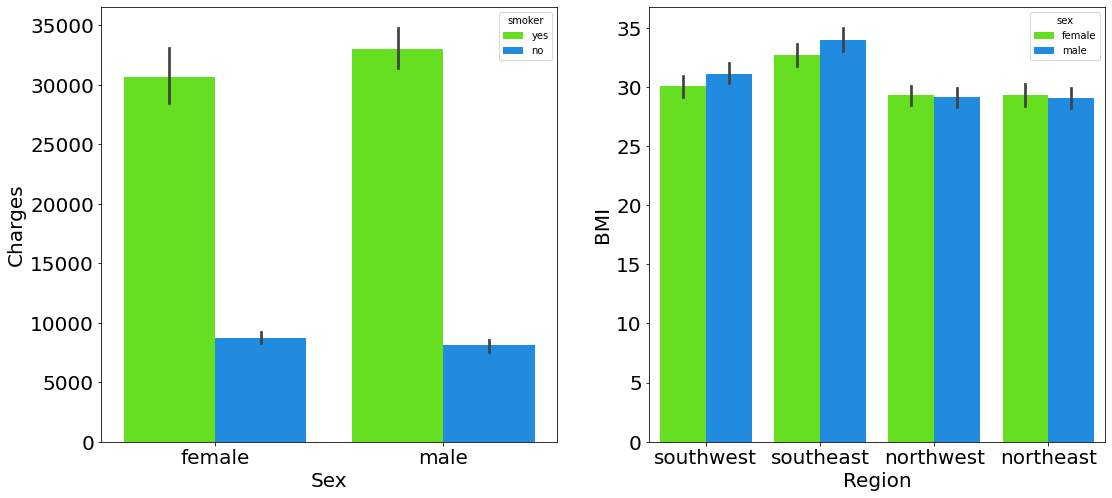

In [138]:
#numerical - categorical col analysis
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.barplot(df["sex"],df["charges"],hue=df["smoker"],palette="gist_rainbow")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Sex",fontsize=20)
plt.ylabel("Charges",fontsize=20) 
 

plt.subplot(122)
sns.barplot(df["region"],df["bmi"],hue=df["sex"],palette= 'gist_rainbow')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Region",fontsize=20)
plt.ylabel("BMI",fontsize=20)

<AxesSubplot:xlabel='age'>

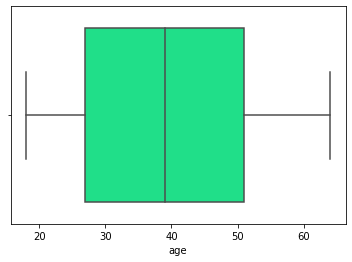

In [139]:
#checking for outlier in age col...
sns.boxplot(df["age"],palette="gist_rainbow") #colors=["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400"]

In [140]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [141]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Apply label encoding to each column
df['sex'] = encoder.fit_transform(df['sex'])
df['smoker'] = encoder.fit_transform(df['smoker'])
df['region'] = encoder.fit_transform(df['region'])


**No outliers detected**

In [142]:
#get the features and terget col
Y=df.charges
X=df.drop(["charges"],axis=1)
#train test split  
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print()
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (1069, 6)
X_test shape:  (268, 6)

Y_train shape:  (1069,)
Y_test shape:  (268,)


In [173]:
def models_score(models, x_train, x_test, y_train, y_test):    
    scores = {'Model': [], 'R2 Score': [], 'MSE': [], 'Training Score': [], 'Testing Score': [], 'Loss %': []}
    
    for name, model in models.items():
        # Training phase
        model.fit(x_train, y_train)
        y_train_pred = model.predict(x_train)
        train_r2 = r2_score(y_train, y_train_pred)
        train_mse = mean_squared_error(y_train, y_train_pred)
        
        # Testing phase
        y_test_pred = model.predict(x_test)
        test_r2 = r2_score(y_test, y_test_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        
        # Loss Percentage calculation
        max_mse = max(train_mse, test_mse)
        train_loss_percentage = (train_mse / max_mse) * 100
        test_loss_percentage = (test_mse / max_mse) * 100
        
        # Appending scores to the dictionary
        scores['Model'].append(name)
        scores['R2 Score'].append(test_r2)
        scores['MSE'].append(test_mse)
        scores['Training Score'].append(train_r2)
        scores['Testing Score'].append(test_r2)
        scores['Loss %'].append(test_loss_percentage)
        
        # Printing the model name and scores
        print(f"Model: {name}")
        print(f"Training R2 Score: {train_r2}")
        print(f"Testing R2 Score: {test_r2}")
        print(f"Training MSE: {train_mse}")
        print(f"Testing MSE: {test_mse}")
        print(f"Loss %: {test_loss_percentage}")
        print("\n<<<<------------------------------------------------------------->>>>\n")
   
    model_scores = pd.DataFrame(scores)
    
    # Check if columns exist before sorting
    if 'Testing R2 Score' in model_scores.columns and 'Testing MSE' in model_scores.columns:
        model_scores = model_scores.sort_values(by=['Testing R2 Score', 'Testing MSE'], ascending=[False, True])
    
    return model_scores


In [174]:
#initialize the models 
models = {"LinearRegression":LinearRegression(),
          "AdaBoost":AdaBoostRegressor(learning_rate= 0.001,loss='exponential',n_estimators= 50,random_state=42),
          "GradiantBoost":GradientBoostingRegressor(criterion= 'mse',learning_rate= 0.05, loss="ls",n_estimators= 100,random_state=42),
         "RandomForest":RandomForestRegressor(criterion='mae',n_estimators=150,max_depth=8,random_state=42),
         "XgBoost": XGBRegressor(),
         "KNeighborsRegressor":KNeighborsRegressor(metric ='minkowski',n_neighbors= 9, weights= 'distance')}

In [175]:
#Calling the function
model_scores = models_score(models, x_train, x_test, y_train, y_test)

Model: LinearRegression
Training R2 Score: 0.7297182858804965
Testing R2 Score: 0.8068466322629109
Training MSE: 37005531.72811554
Testing MSE: 35493102.61165056
Loss %: 95.9129647762475

<<<<------------------------------------------------------------->>>>

Model: AdaBoost
Training R2 Score: 0.8502234631161207
Testing R2 Score: 0.8962780848545229
Training MSE: 20506605.139158808
Testing MSE: 19059530.88193777
Loss %: 92.94337484239286

<<<<------------------------------------------------------------->>>>

Model: GradiantBoost
Training R2 Score: 0.8742039094612779
Testing R2 Score: 0.901669582794596
Training MSE: 17223330.238483418
Testing MSE: 18068810.44118425
Loss %: 100.0

<<<<------------------------------------------------------------->>>>

Model: RandomForest
Training R2 Score: 0.9124236962024164
Testing R2 Score: 0.897326177960797
Training MSE: 11990480.744767148
Testing MSE: 18866937.41798023
Loss %: 100.0

<<<<------------------------------------------------------------->>>>


In [176]:
model_scores

,Model,R2 Score,MSE,Training Score,Testing Score,Loss %
0,LinearRegression,0.806847,3.549310e+07,0.729718,0.806847,95.912965
1,AdaBoost,0.896278,1.905953e+07,0.850223,0.896278,92.943375
2,GradiantBoost,0.901670,1.806881e+07,0.874204,0.901670,100.000000
3,RandomForest,0.897326,1.886694e+07,0.912424,0.897326,100.000000
4,XgBoost,0.869246,2.402677e+07,0.994928,0.869246,100.000000
5,KNeighborsRegressor,0.101645,1.650782e+08,1.000000,0.101645,100.000000


In [177]:
model_scores = model_scores.reset_index().rename({"index":"Algorithms"}, axis = 1)

model_scores.style.bar()

,Algorithms,Model,R2 Score,MSE,Training Score,Testing Score,Loss %
0,0,LinearRegression,0.806847,35493102.611651,0.729718,0.806847,95.912965
1,1,AdaBoost,0.896278,19059530.881938,0.850223,0.896278,92.943375
2,2,GradiantBoost,0.901670,18068810.441184,0.874204,0.901670,100.000000
3,3,RandomForest,0.897326,18866937.417980,0.912424,0.897326,100.000000
4,4,XgBoost,0.869246,24026770.295881,0.994928,0.869246,100.000000
5,5,KNeighborsRegressor,0.101645,165078208.367186,1.000000,0.101645,100.000000
